# AM and FM Radio Waves

Radio waves are used to transmit information quickly across long distances. They are generated by a transmitter and sent to a receiver.

In order to encode information in a wave, you need to have a carrier wave, and some kind of modulation. The carrier wave has some kind of constant, which can be used to identify waves from a specific source (like a radio station.) Modulation is the way that you change that wave so that it can contain dynamic information.

In order to understand the waves picked up by the receiver, you need a demodulator. Demodulators are usually really complicated electrical curcuits.

## Wave Equations

The simplest function to create a wave is a sine function. It takes this general format as a function *V* of *t* which is time:
$ V(t) = a * sin(f * t) $
Where *f* is the frequency and *a* is the amplitude.

## Amplitude Modulation

In amplitude modulated (AM) radio waves, the carrier signal has a constant frequency, and the waves change their amplitude to encode information.

As explained above, the amplitude of a sine wave can be changed by multiplying the whole thing by a number. AM simply means multiplying the whole thing by the information wave.

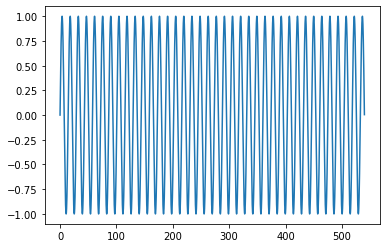

In [1]:
%matplotlib inline
# In this case, the carrier wave will have a frequency of 25, and a starting amplitude of 1.

from utils import (
    add_waves,
    asin,
    create_wave,
    draw_graph,
    draw_wave,
    sin
)


CARRIER_FREQUENCY = 25
CARRIER_AMPLITUDE = 1


def carrier_signal(t):
    return CARRIER_AMPLITUDE * float(sin(CARRIER_FREQUENCY * t))

draw_graph(carrier_signal)

The second thing we need is some information. For this example, that will just be a simple sine wave.

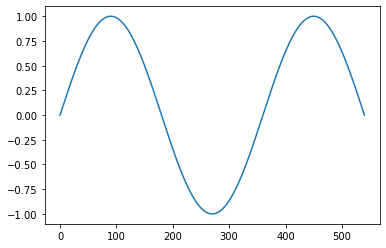

In [2]:
def information(t):
    return float(sin(t))

draw_graph(information)

Next, we multiply the whole thing by the information each time, and that creates an AM wave containing our information.

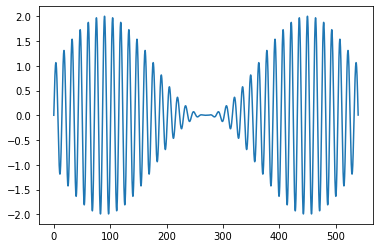

In [3]:
def AM_signal(t):
    return (CARRIER_AMPLITUDE + information(t)) * float(sin(CARRIER_FREQUENCY * t))

draw_graph(AM_signal)

### Demodulation of AM Signals

Now that we have a function that performs amplitude modulation, we can decode that information when it gets back to us with a *demodulator*. As you can see, after the AM signal is demodulated, we get back our information.

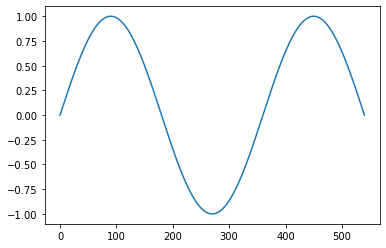

In [4]:
def demodulate_AM(wave):
    demodulated_wave = []

    for x, y in wave:
        try:
            demodulated_wave.append(
                (x, y / float(sin(CARRIER_FREQUENCY * x)) - CARRIER_AMPLITUDE)
            )
        except ZeroDivisionError:
            demodulated_wave.append(
                (x, 0)
            )
    return demodulated_wave

AM_wave = create_wave(AM_signal)
information_wave = demodulate_AM(AM_wave)
draw_wave(information_wave)

## Frequency Modulation

To encode information using frequency modulation, you dynamically change the frequency of the carrier wave. We will be using the same carrier and information waves as we did with AM. As explained in the first section, you can change the frequency of a wave by multiplying the term on the inside of the sine function.

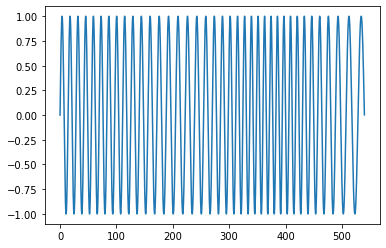

In [5]:
def FM_signal(t):
    return sin((CARRIER_FREQUENCY + information(t)) * t) * CARRIER_AMPLITUDE

draw_graph(FM_signal)

### Demodulation of FM Signals

The demodulation process with FM signals is the same. You simply take the opposite steps as you did to modulate the wave.

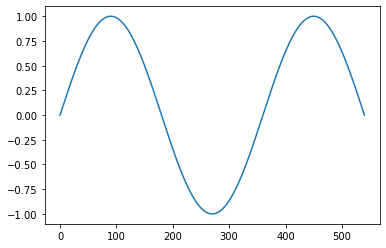

In [6]:
def demodulate_FM(wave):
    demodulated_wave = []

    for x, y in wave:
        try:
            demodulated_wave.append(
                (x, (asin(y / CARRIER_AMPLITUDE) / x) - CARRIER_FREQUENCY)
            )
        except ZeroDivisionError:
            demodulated_wave.append(
                (x, 0)
            )
    return demodulated_wave

FM_wave = create_wave(FM_signal)
information_wave = demodulate_FM(FM_wave)
draw_wave(information_wave)

## Interference

Interference occurs when two waves collide, and they create a single wave that is different from the both of them. Because there is a constant radio noise that radio signals are traveling through, radio waves are often subject to interference, reducing the quality of the information taken by the receiver.

The rule for calculating the new wave is simply adding the two interfering waves together.

First, we will see how our AM signal is changed after being interfered with by another wave with the equation $V(t) = 0.5sin(t + 90)$. *Note that having the "+ 90" inside the sine function means that the wave will be shifted to the right by 90 units.*

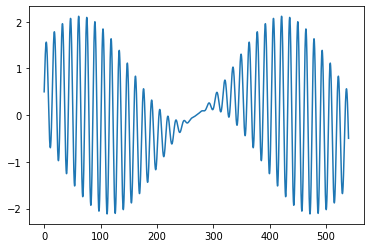

In [7]:
def noise(t):
    return 0.5 * float(sin(t + 90))

noise_wave = create_wave(noise)
# Add their values together for each point in time.
interfered_AM_signal = add_waves(AM_wave, noise_wave)
draw_wave(interfered_AM_signal)

Now, when this interfered-with wave is demodulated, it clearly doesn't give the same information.

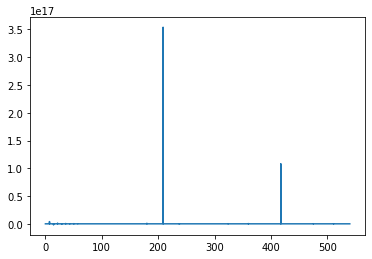

In [8]:
interfered_AM_demodulated = demodulate_AM(interfered_AM_signal)
draw_wave(interfered_AM_demodulated)

Now we can see how the same wave affects the FM signal.

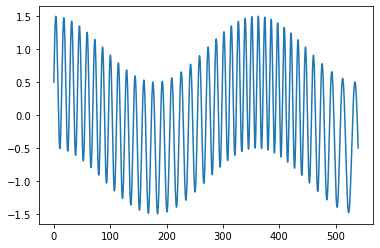

In [9]:
interfered_FM_signal = add_waves(FM_wave, noise_wave)
draw_wave(interfered_FM_signal)

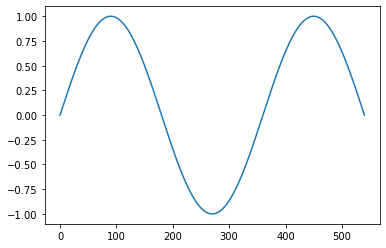

In [10]:
interfered_FM_demodulated = demodulate_FM(interfered_FM_signal)
draw_wave(interfered_FM_demodulated)

As you could see from the above examples, when an AM signal gets interfered with by noise, it is competely ruined. However, when an FM signal gets interfered with by noise, its message is completely unchanged.

This is why FM signals are more reliable over long distances than AM signals.